In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy

In [8]:
A = ('A', 'B')
C = A + ('C',)
print(C)
print(type(C))

('A', 'B', 'C')
<class 'tuple'>


In [9]:
n = 6
A = np.zeros((n,n))
for i in range (n):
    for j in range (n):
        A[i,j] = i*n+j
    print(A)

[[0. 1. 2. 3. 4. 5.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]
 [ 0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29.]
 [ 0.  0.  0.  0.  0.  0.]]
[[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]
 [18. 19. 20. 21. 22. 23.]
 [24. 25. 26. 27. 28. 29.]
 [30. 31. 32. 33. 34. 35.]]


In [11]:
print(A.reshape(-1,))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.]


In [12]:
from PIL import Image

# 이미지 파일 경로
image_path = 'my_input.jpg'

# 이미지 파일 열기
image = Image.open(image_path)

# 이미지 데이터를 numpy 배열로 변환
image_array = np.array(image)

# 이미지 배열의 원래 shape 확인 (height, width, channel)
print("원래 이미지 shape:", image_array.shape)

# numpy의 expand_dims를 사용해서 차원 확장 (batch, height, width, channel)
expanded_image = np.expand_dims(image_array, axis=0)
print("차원 확장된 이미지 shape:", expanded_image.shape)

# numpy의 transpose를 사용해서 차원 순서 변경 (batch, channel, height, width)
transposed_image = np.transpose(expanded_image, (0, 3, 1, 2))
print("차원 순서 변경된 이미지 shape:", transposed_image.shape)


원래 이미지 shape: (500, 612, 3)
차원 확장된 이미지 shape: (1, 500, 612, 3)
차원 순서 변경된 이미지 shape: (1, 3, 500, 612)


In [1]:
import cv2
import numpy as np

img = cv2.imread('my_input.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
print(kernel)
output = cv2.filter2D(img, -1, kernel)
cv2.imshow('edge', output)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


In [2]:
import cv2
import numpy as np

# 이미지를 불러옵니다 (경로를 입력해주세요)
img = cv2.imread('my_input.jpg', cv2.IMREAD_GRAYSCALE)

# 커널을 정의합니다
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])
print(kernel)

# 이미지의 높이, 너비를 얻습니다
img_height, img_width = img.shape

# 커널의 높이, 너비를 얻습니다
kernel_height, kernel_width = kernel.shape

# 출력 이미지를 초기화합니다
output = np.zeros((img_height, img_width), dtype=np.float32)

# 패딩 크기를 계산합니다
pad_height = kernel_height // 2
pad_width = kernel_width // 2

# 이미지를 패딩합니다
padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

# 컨볼루션을 수행합니다
for i in range(img_height):
    for j in range(img_width):
        # 현재 위치에서 커널과 이미지의 요소별 곱셈을 수행하고 합산합니다
        region = padded_img[i:i + kernel_height, j:j + kernel_width]
        output[i, j] = np.sum(region * kernel)

# 출력을 정규화합니다 (선택 사항, 이미지 데이터를 시각화할 때 유용함)
output = cv2.normalize(output, None, 0, 255, cv2.NORM_MINMAX)
output = np.uint8(output)

# 결과 이미지를 표시합니다
cv2.imshow('edge', output)
cv2.waitKey(0)
cv2.destroyAllWindows()


[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]]


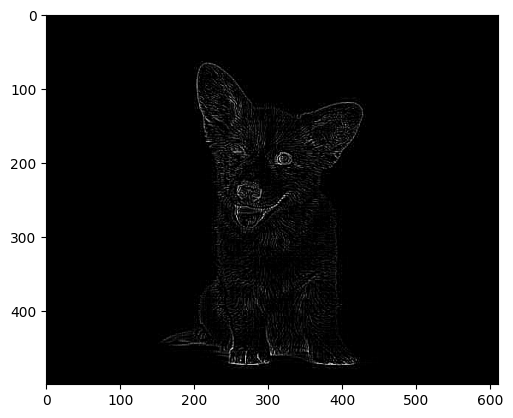

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import copy

# 이미지를 불러옵니다
img = cv2.imread('my_input.jpg', cv2.IMREAD_GRAYSCALE)
kernel = np.array([[1, 1, 1], [1, -8, 1], [1, 1, 1]])

# 이미지 복사본을 만듭니다
imgcpy = copy.deepcopy(img)
imgcpy2 = np.zeros((imgcpy.shape[0], imgcpy.shape[1]), dtype=int)

# 컨볼루션 연산 수행
for h in range(1, img.shape[0]-1):
    for w in range(1, img.shape[1]-1):
        region = img[h-1:h+2, w-1:w+2]
        img_tmp = np.sum(region * kernel)
        imgcpy2[h, w] = img_tmp

# 결과를 정규화하여 출력합니다
imgcpy2 = np.clip(imgcpy2, 0, 255)
imgcpy2 = imgcpy2.astype(np.uint8)

# 결과 이미지를 표시합니다
plt.imshow(imgcpy2, cmap='gray')
plt.show()
